In [3]:
import pandas as pd
import numpy as np

## constants
cdSrPerWatt = 683       # Wikipedia for Candela
h=6.62607 * 10**(-34) # Planck's constant, J.s
c=299792458           # speed of light, m/s
acceptanceAngle=8.23  # degrees, from Gonzalez-Bellido et al
ommatidiumDia=16.85*10**(-6) # m, Gonzalez-Bellido et al, 2011 Supp
candelas = pd.read_excel('Luminances_mean.xlsx') #your data
wavelength_of_interest = 475     # set value

#function photonVal
def convert_cd_to_photons_mk(cdVal,wavelength): 
#converts cd/sq m values to photons per s per receptor
#wavelength has to be in nm

    ## import photopic luminosity function (LS-100 uses it) and convert cd to watt
    #luminosity = pd.read_fwf('photopic luminosity function.txt')
    #read_in_table = pd.read_fwf('photopic luminosity function.txt')
    ##spectrum = csvread('relative spectral distribution_LED panels.csv')
    ##spectrum=spectrum(1:2:end,:); # downsampling to match luminosity function data
    luminosity_df = pd.read_csv('photopic luminosity function.txt', sep="\t", header=None)
    luminosity = luminosity_df[luminosity_df[0]==wavelength][1]
    luminosity = float(luminosity)
    wattVal = cdVal/(cdSrPerWatt*luminosity)   # in the row of wavelength (multiples of 5)
    
    ## convert cd to photons per s per sr per sq m
    energyPerPhoton=h*c/(wavelength*10**-9)     # J
    photonsPerSSrSqM=wattVal/energyPerPhoton   # from here, we work on replacing per sr per sq m by per receptor

    ## convert acceptance angle to steradians (Integration over Gaussian angular sensitivity function, Dubs et al 1981)
    acceptanceAngleRad=acceptanceAngle*np.pi/180  # conversion to Rad
    acceptanceSteradians=acceptanceAngleRad**2*np.pi/(4*np.log(2))

    ## flux to one ommatidium/receptor
    ommatidiumArea = np.pi*(ommatidiumDia/2)**2      # sq m
    photonVal=photonsPerSSrSqM*ommatidiumArea*acceptanceSteradians # as required
   
    return photonVal




In [4]:
candelas

,stimulus,without mean,ND 0.1 mean,ND 0.3 mean,ND 0.6 mean,ND 1.0 mean,ND 1.3 mean,ND 2.0 mean
0,0.0,0.003000,0.003000,0.003000,0.001000,0.000000,0.000000,0.000000
1,0.1,0.187000,0.151000,0.100000,0.048667,0.019000,0.009000,0.002000
2,0.2,0.373000,0.301333,0.199333,0.097333,0.039000,0.017667,0.004000
3,0.3,0.556333,0.449667,0.297333,0.145667,0.057333,0.026333,0.005667
4,0.4,0.738000,0.595667,0.394667,0.193000,0.076000,0.034333,0.007667
5,0.5,0.938000,0.750667,0.497333,0.243000,0.095000,0.043333,0.009000
6,0.6,1.111667,0.897667,0.595667,0.292000,0.113667,0.051667,0.011000
7,0.7,1.293333,1.046000,0.693667,0.340000,0.133000,0.060333,0.013000
8,0.8,1.481667,1.225333,0.811000,0.398333,0.155333,0.070667,0.015000
9,0.9,1.700333,1.373333,0.910333,0.447667,0.174000,0.079000,0.016667


In [5]:
convert_cd_to_photons_mk(candelas,475) 


,stimulus,without mean,ND 0.1 mean,ND 0.3 mean,ND 0.6 mean,ND 1.0 mean,ND 1.3 mean,ND 2.0 mean
0,0.000000,248.955506,248.955506,248.955506,82.985169,0.000000,0.000000,0.000000
1,8298.516855,15518.226518,12530.760451,8298.516855,4038.611536,1576.718202,746.866517,165.970337
2,16597.033709,30953.467868,25006.197456,16541.710264,8077.223072,3236.421573,1466.071311,331.940674
3,24895.550564,46167.415435,37315.664123,24674.256781,12088.172885,4757.816330,2185.276105,470.249288
4,33194.067419,61243.054388,49431.498731,32751.479853,16016.137530,6306.872810,2849.157453,636.219626
5,41492.584274,77840.088097,62294.199856,41271.290491,20165.395957,7883.591012,3596.023970,746.866517
6,49791.101128,92251.845702,74493.019633,49431.498731,24231.669216,9432.647492,4287.567042,912.836854
7,58089.617983,107327.484654,86802.486300,57564.045249,28214.957306,11037.027417,5006.771836,1078.807191
8,66388.134838,122956.358064,101684.493193,67300.971692,33055.758805,12890.362848,5864.285244,1244.777528
9,74686.651693,141102.448253,113966.298138,75544.165101,37149.693786,14439.419327,6555.828315,1383.086142


In [6]:
stim = candelas['stimulus']
withoutND = candelas['without mean']
ND_0_1= candelas['ND 0.1 mean']
ND_0_3= candelas['ND 0.3 mean']
ND_0_6= candelas['ND 0.6 mean']
ND_1_0= candelas['ND 1.0 mean']
ND_1_3= candelas['ND 1.3 mean']
ND_2_0= candelas['ND 2.0 mean']
del candelas['stimulus']

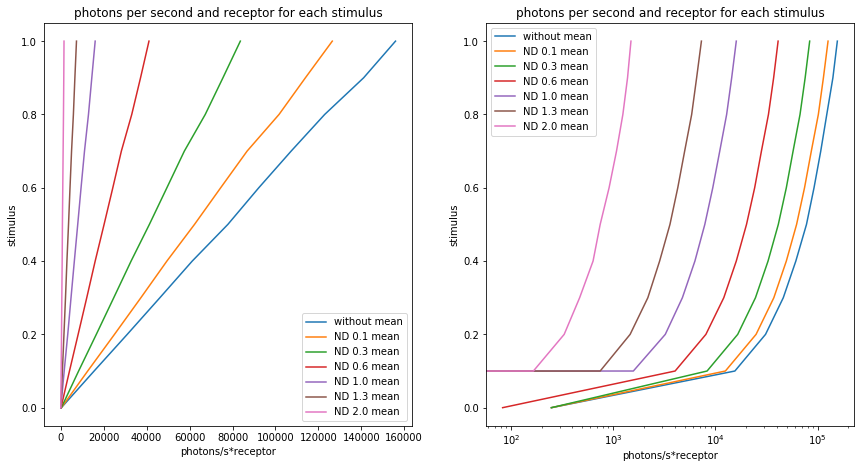

In [7]:
import matplotlib.pyplot as plt


plt.subplot(121)
plt.plot(convert_cd_to_photons_mk(candelas,475), stim) 

def title_axis():
    plt.title('photons per second and receptor for each stimulus')
    plt.xlabel('photons/s*receptor')
    plt.ylabel('stimulus')
title_axis()
plt.legend(candelas.columns)

plt.subplot(122)
plt.plot(convert_cd_to_photons_mk(candelas,475), stim) 

def title_axis():
    plt.title('photons per second and receptor for each stimulus')
    plt.xlabel('photons/s*receptor')
    plt.ylabel('stimulus')
title_axis()
plt.legend(candelas.columns)
plt.xscale('log')

plt.subplots_adjust(bottom=0.1, right=2, top=1.5)



In [8]:
#np.array(candelas.iloc[2:5][1:]).mean()
#cd_values =convert_cd_to_photons_mk(nd_0,475)
#stim_vals =[0, 0.1, ...]
#nd_0.shape()

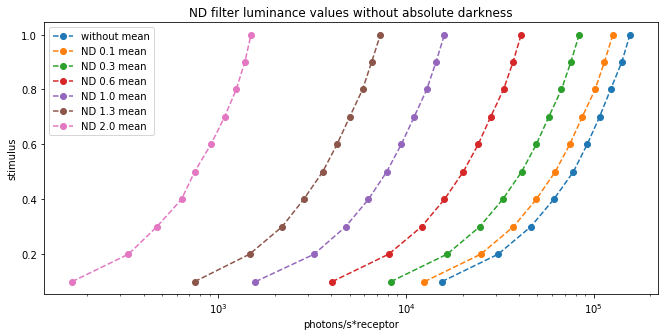

In [9]:
# If we consider 0 absolute 0 then we can just plot the points from 0.1 so our measurements are
f = plt.figure(figsize=(11,5))
plt.plot(np.array(convert_cd_to_photons_mk(candelas,475))[1:,:], stim[1:],'--o')
plt.title('ND filter luminance values without absolute darkness')
plt.xlabel('photons/s*receptor')
plt.ylabel('stimulus')
plt.legend(candelas.columns)
plt.xscale('log')

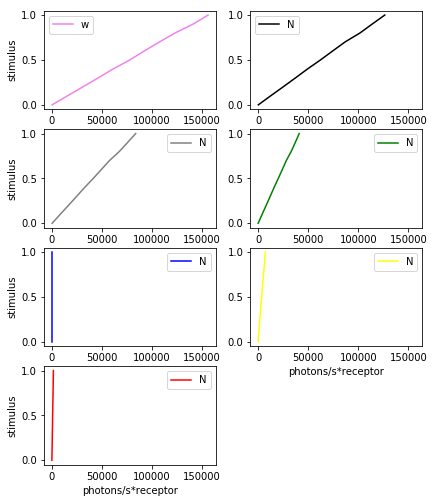

In [69]:
ax1= plt.subplot(621)
plt.plot(convert_cd_to_photons_mk(withoutND, 475), stim, color = "violet")
#plt.xlabel('photons/s*receptor')
plt.ylabel('stimulus')
plt.legend('withoutND')
#plt.setp(ax1.get_xticklabels(), fontsize=6)

ax2 = plt.subplot(622, sharex=ax1, sharey=ax1)
plt.plot(convert_cd_to_photons_mk(ND_0_1,475), stim, color = "black")
#plt.xlabel('photons/s*receptor')
#plt.ylabel('stimulus')
plt.legend('ND_0_1')
#plt.setp(ax2.get_xticklabels(), fontsize=6)

ax3 = plt.subplot(623,sharex=ax1, sharey=ax1)
plt.plot(convert_cd_to_photons_mk(ND_0_3,475), stim, color = "grey")
#plt.xlabel('photons/s*receptor')
plt.ylabel('stimulus')
plt.legend('ND_0_3')
#plt.setp(ax3.get_xticklabels(), visible=False)

ax4 = plt.subplot(624,sharex=ax1, sharey=ax1)
plt.plot(convert_cd_to_photons_mk(ND_0_6, 475), stim, color = "green")
#plt.xlabel('photons/s*receptor')
#plt.ylabel('stimulus')
plt.legend('ND_0_6')
#plt.setp(ax4.get_xticklabels(), visible=False)

plt.subplot(625,sharex=ax1, sharey=ax1)
plt.plot(ND_1_0, stim, color = "blue")
#plt.xlabel('photons/s*receptor')
plt.ylabel('stimulus')
plt.legend('ND_1_0')

ax6 = plt.subplot(626,sharex=ax1, sharey=ax1)
plt.plot(convert_cd_to_photons_mk(ND_1_3, 475), stim, color = "yellow")
plt.xlabel('photons/s*receptor')
#plt.ylabel('stimulus')
plt.legend('ND_1_3')
#plt.setp(ax6.get_xticklabels(), fontsize=6)

plt.subplot(627,sharex=ax1, sharey=ax1)
plt.plot(convert_cd_to_photons_mk(ND_2_0,475), stim, color = "red")
plt.xlabel('photons/s*receptor')
plt.ylabel('stimulus')
plt.legend('ND_2_0')

plt.subplots_adjust(bottom=0.1, right=1.0, top=2.5)
#.savefig('NAME.png', bbox_inches='tight',transparent=False,dpi=300)

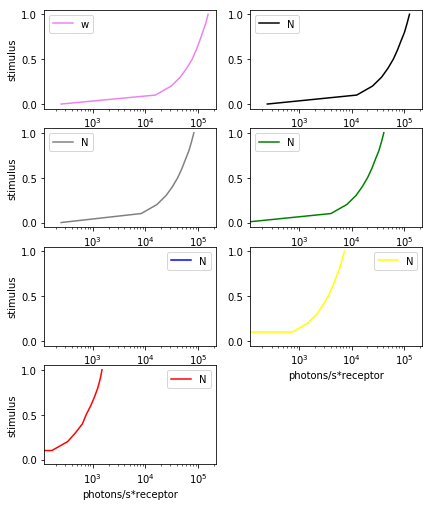

In [71]:
ax1= plt.subplot(621)
plt.plot(convert_cd_to_photons_mk(withoutND, 475), stim, color = "violet")
#plt.xlabel('photons/s*receptor')
plt.ylabel('stimulus')
plt.legend('withoutND')
#plt.setp(ax1.get_xticklabels(), fontsize=6)

ax2 = plt.subplot(622, sharex=ax1, sharey=ax1)
plt.plot(convert_cd_to_photons_mk(ND_0_1,475), stim, color = "black")
#plt.xlabel('photons/s*receptor')
#plt.ylabel('stimulus')
plt.legend('ND_0_1')
#plt.setp(ax2.get_xticklabels(), fontsize=6)

ax3 = plt.subplot(623,sharex=ax1, sharey=ax1)
plt.plot(convert_cd_to_photons_mk(ND_0_3,475), stim, color = "grey")
#plt.xlabel('photons/s*receptor')
plt.ylabel('stimulus')
plt.legend('ND_0_3')
#plt.setp(ax3.get_xticklabels(), visible=False)

ax4 = plt.subplot(624,sharex=ax1, sharey=ax1)
plt.plot(convert_cd_to_photons_mk(ND_0_6, 475), stim, color = "green")
#plt.xlabel('photons/s*receptor')
#plt.ylabel('stimulus')
plt.legend('ND_0_6')
#plt.setp(ax4.get_xticklabels(), visible=False)

ax5 = plt.subplot(625,sharex=ax1, sharey=ax1)
plt.plot(ND_1_0, stim, color = "blue")
#plt.xlabel('photons/s*receptor')
plt.ylabel('stimulus')
plt.legend('ND_1_0')

ax6 = plt.subplot(626,sharex=ax1, sharey=ax1)
plt.plot(convert_cd_to_photons_mk(ND_1_3, 475), stim, color = "yellow")
plt.xlabel('photons/s*receptor')
#plt.ylabel('stimulus')
plt.legend('ND_1_3')
#plt.setp(ax6.get_xticklabels(), fontsize=6)

ax7 = plt.subplot(627,sharex=ax1, sharey=ax1)
plt.plot(convert_cd_to_photons_mk(ND_2_0,475), stim, color = "red")
plt.xlabel('photons/s*receptor')
plt.ylabel('stimulus')
plt.legend('ND_2_0')

plt.subplots_adjust(bottom=0.1, right=1.0, top=2.5)
#.savefig('NAME.png', bbox_inches='tight',transparent=False,dpi=300)
plt.xscale('log')